In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
np.random.seed(42)
n = 100

X1 = np.random.uniform(1, 10, n)
X2 = np.random.uniform(10, 50, n)
X3 = np.random.uniform(100, 500, n)

In [3]:
X1, X2, X3

(array([4.37086107, 9.55642876, 7.58794548, 6.38792636, 2.40416776,
        2.40395068, 1.52275251, 8.79558531, 6.41003511, 7.3726532 ,
        1.18526045, 9.72918867, 8.49198377, 2.911052  , 2.6364247 ,
        2.65064059, 3.73818019, 5.72280788, 4.88750517, 3.62106226,
        6.50667605, 2.25544475, 3.62930184, 4.29725659, 5.10462986,
        8.06658365, 2.79706404, 5.62810995, 6.33173112, 1.41805371,
        6.46790367, 2.53471711, 1.58546434, 9.53996984, 9.6906883 ,
        8.27557613, 3.74152392, 1.87904903, 7.15809724, 4.96137244,
        2.09834411, 5.45659219, 1.30949669, 9.18388362, 3.32901983,
        6.96270056, 3.80539968, 5.68061219, 5.92039251, 2.6636901 ,
        9.72626165, 7.97619541, 9.45549047, 9.05344615, 6.38109981,
        9.29686812, 1.79643252, 2.76384576, 1.4070456 , 3.92797298,
        4.49809561, 3.44214129, 8.45863758, 4.21077994, 3.52841059,
        5.88426475, 2.26831802, 8.21977283, 1.67095579, 9.88198243,
        7.95020292, 2.78844113, 1.04969905, 8.33

In [4]:
y = 5 + 2*X1 - 0.5*X2 + 0.1*X3 + np.random.normal(0,5, n)

In [5]:
y

array([44.02226347, 16.49224615, 36.07364034, 51.71620154, 10.7884555 ,
       11.12221042,  5.58777595, 43.28238529, 14.48396656, 29.06434805,
       31.04977981, 58.23853547, 28.46698283,  6.9579626 , 28.71721658,
        4.09538671, 23.24617796, 49.59877935, 21.60472656, 45.01352584,
       43.77984568, 24.48373393,  7.04867506, 28.68093645, 32.59320692,
       23.81224994, 40.37335209, 23.63868748, 53.57162948, 27.56907964,
       30.17370271, 25.61082353, 32.58693596, 35.78942809, 26.49495855,
       41.83447135, 16.13790747,  1.32406042, 50.06886071,  0.39221965,
       38.38190446, 54.08584685, 34.36105562, 39.46706642, 12.57479292,
       57.31932029, 22.89588905, 48.04726869, 59.92359581, 47.18548251,
       30.99524534, 30.37598466, 70.72371724, 21.23427831,  9.06997493,
       48.96626733, 39.00130439, 25.02299348, 29.82317587,  4.71367406,
       33.29399384, 48.08833045, 21.63511899, 24.97470432, 54.84394803,
       36.2297219 , 40.06597498, 53.95668301, 22.76107975, 26.88

In [6]:
data = pd.DataFrame({"X1":X1, "X2":X2, "X3":X3, "y":y})

In [7]:
data.head()

,X1,X2,X3,y
0,4.370861,11.257167,356.812658,44.022263
1,9.556429,35.456416,133.655986,16.492246
2,7.587945,22.574239,164.651486,36.073640
3,6.387926,30.342828,459.421675,51.716202
4,2.404168,46.302659,342.571624,10.788456


In [8]:
X = np.column_stack((np.ones(n), X1, X2, X3))
y = y.reshape(-1,1)

In [11]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [14]:
print("Estimated Coefficients (β)")
print(f"Intercept: {beta[0][0]:.3f}")
print(f"β1:{beta[1][0]:.3f}, β2:{beta[2][0]:.3f}, β3:{beta[3][0]:.3f}")

Estimated Coefficients (β)
Intercept: 2.096
β1:2.231, β2:-0.474, β3:0.104


In [17]:
y_pred = X @ beta
residuals = y - y_pred

#### Model preformance metrics

In [18]:
MAE = np.mean(residuals)
MSE = np.mean(residuals**2)
RMSE = np.sqrt(MSE)
R2 = 1 - np.sum(residuals**2) / np.sum((y - np.mean(y))**2)

print(f"Model Performance: ")
print(f"MAE: {MAE:.3f}")
print(f"MSE: {MSE:.3f}")
print(f"RMSE: {RMSE:.3f}")
print(f"R²: {R2:.3f}")

Model Performance: 
MAE: -0.000
MSE: 23.207
RMSE: 4.817
R²: 0.908


### Assumption Checks

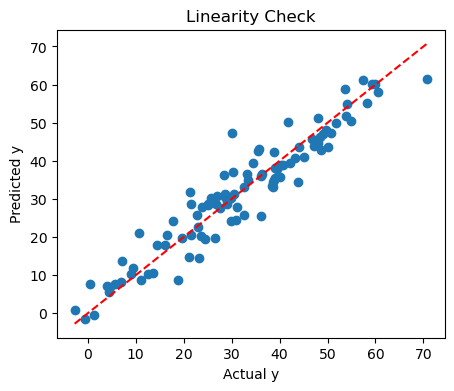

In [21]:
### (a) Linearity: Predicted vs Actual
plt.figure(figsize=(5,4))
plt.scatter(y, y_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Linearity Check")
plt.plot([y.min(), y.max()],[y.min(),y.max()], "r--")
plt.show()

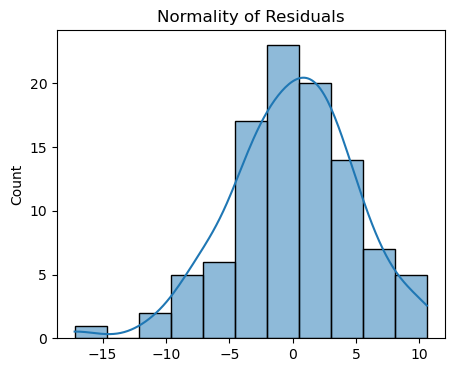

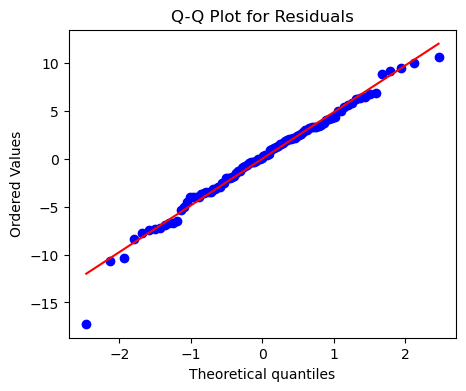

In [23]:
### (b) Normality of residuals
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(residuals.flatten(), kde=True)
plt.title("Normality of Residuals")
plt.show()


# Q-Q Plot
plt.figure(figsize=(5,4))
stats.probplot(residuals.flatten(), dist="norm", plot = plt)
plt.title("Q-Q Plot for Residuals")
plt.show()

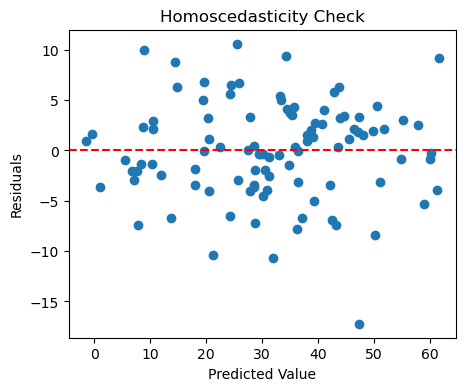

In [24]:
### (c) Homoscedasticity (Equal variance)
plt.figure(figsize=(5,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

In [25]:
### (d) Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [26]:
X_vif = sm.add_constant(data[['X1', 'X2', 'X3']])
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("Variance Inflatino Factor (VIF):")
print(vif_data)

Variance Inflatino Factor (VIF):
  Feature        VIF
0   const  21.575033
1      X1   1.003025
2      X2   1.023526
3      X3   1.023792


In [28]:
## (e) Independence (Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals.flatten())
print(f"Durbin-Watson statistic: {dw:.3f}")

Durbin-Watson statistic: 2.376
